In [125]:
import pandas as pd
import numpy as np

In [227]:
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from pandas_ml import ConfusionMatrix
from sklearn import model_selection

# Loading Dataset- Bank Marketing Data
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y)
Reference: https://www.kaggle.com/henriqueyamahata/bank-marketing

Features Count: 20 and Rows: 41188

In [201]:
bank_data = pd.read_csv('./bank-additional-full.csv')
bank_data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [202]:
#Total rows and columns in dataset
bank_data.shape

(41188, 21)

In [203]:
#Checking missing/null values
bank_data.isnull().values.any()

False

# Converting Categorical features into numerical features 

In [204]:
bank_data["job"] = bank_data["job"].astype('category')
bank_data["marital"] = bank_data["marital"].astype('category')
bank_data["education"] = bank_data["education"].astype('category')
bank_data["default"] = bank_data["default"].astype('category')
bank_data["housing"] = bank_data["housing"].astype('category')
bank_data["loan"] = bank_data["loan"].astype('category')
bank_data["contact"] = bank_data["contact"].astype('category')
bank_data["month"] = bank_data["month"].astype('category')
bank_data["day_of_week"] = bank_data["day_of_week"].astype('category')
bank_data["poutcome"] = bank_data["poutcome"].astype('category')
bank_data["y"] = bank_data["y"].astype('category')

In [205]:
bank_data["job"] = bank_data["job"].cat.codes
bank_data["marital"] = bank_data["marital"].cat.codes
bank_data["education"] = bank_data["education"].cat.codes
bank_data["default"] = bank_data["default"].cat.codes
bank_data["housing"] = bank_data["housing"].cat.codes
bank_data["loan"] = bank_data["loan"].cat.codes
bank_data["contact"] = bank_data["contact"].cat.codes
bank_data["month"] = bank_data["month"].cat.codes
bank_data["day_of_week"] = bank_data["day_of_week"].cat.codes
bank_data["poutcome"] = bank_data["poutcome"].cat.codes
bank_data["y"] = bank_data["y"].cat.codes

# Case 1: Naive Bayes on all instances as training data and test data
- Building a naïve Bayes classifier

### Splitting dataset features and target values

In [234]:
x = bank_data.iloc[:,0:20]
y = bank_data.iloc[:,20:21]

### Fitting Naive Bayes algorithm 

In [207]:
model = GaussianNB()
model.fit(x, y)
yhat = model.predict(x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Summary

In [208]:
print('Accuracy:')
print(metrics.accuracy_score(y, yhat))
print('Classification report:')
print(metrics.classification_report(y, yhat))

Accuracy:
0.8465572496843741
Classification report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91     36548
           1       0.38      0.60      0.47      4640

   micro avg       0.85      0.85      0.85     41188
   macro avg       0.66      0.74      0.69     41188
weighted avg       0.88      0.85      0.86     41188



In [209]:
y = y["y"]

### Confusion Matrix

Confusion matrix:
Predicted  False  True  __all__
Actual                         
False      32085  4463    36548
True        1857  2783     4640
__all__    33942  7246    41188
Stats:
population: 41188
P: 4640
N: 36548
PositiveTest: 7246
NegativeTest: 33942
TP: 2783
TN: 32085
FP: 4463
FN: 1857
TPR: 0.5997844827586207
TNR: 0.8778866148626464
PPV: 0.384073971846536
NPV: 0.9452890224500619
FPR: 0.12211338513735362
FDR: 0.615926028153464
FNR: 0.4002155172413793
ACC: 0.8465572496843741
F1_score: 0.46828201245162376
MCC: 0.3966449079485113
informedness: 0.477671097621267
markedness: 0.3293629942965979
prevalence: 0.11265417111780131
LRP: 4.911701383791636
LRN: 0.4558852025600103
DOR: 10.773987302527297
FOR: 0.05471097754993813


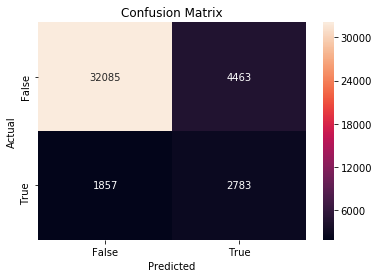

<Figure size 432x288 with 0 Axes>

In [213]:
print('Confusion matrix:')
cm = ConfusionMatrix(y, yhat)
print(cm)
print('Stats:')
cm.print_stats()
ax = cm.plot(backend='seaborn', annot=True, fmt='g')
ax.set_title('Confusion Matrix')
plt.show()
plt.clf()

### ROC plot

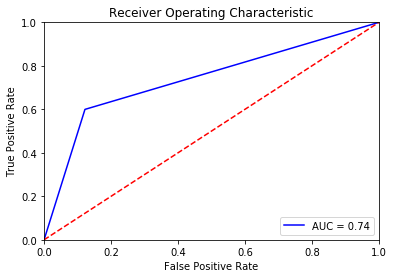

In [214]:
fpr, tpr, threshold = metrics.roc_curve(y, yhat)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Case 2: Naive Bayes on 20% test data and 80% training data

In [217]:
#Spliting dataset into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2, random_state=10)

In [218]:
model = GaussianNB()
model.fit(x_train, y_train)
yhat = model.predict(x_test)

### Summary

In [219]:
print('Accuracy:')
print(metrics.accuracy_score(y_test, yhat))
print('Classification report:')
print(metrics.classification_report(y_test, yhat))

Accuracy:
0.8394027676620539
Classification report:
              precision    recall  f1-score   support

           0       0.94      0.87      0.91      7310
           1       0.36      0.57      0.44       928

   micro avg       0.84      0.84      0.84      8238
   macro avg       0.65      0.72      0.67      8238
weighted avg       0.88      0.84      0.85      8238



### Confusion Matrix

Confusion matrix:
Predicted  False  True  __all__
Actual                         
False       1297   276     1573
True          43     6       49
__all__     1340   282     1622
Stats:
population: 1622
P: 49
N: 1573
PositiveTest: 282
NegativeTest: 1340
TP: 6
TN: 1297
FP: 276
FN: 43
TPR: 0.12244897959183673
TNR: 0.82453909726637
PPV: 0.02127659574468085
NPV: 0.9679104477611941
FPR: 0.17546090273363002
FDR: 0.9787234042553191
FNR: 0.8775510204081632
ACC: 0.8033292231812577
F1_score: 0.03625377643504532
MCC: -0.023941921781722435
informedness: -0.05301192314179326
markedness: -0.010812956494125059
prevalence: 0.03020961775585697
LRP: 0.6978704525288375
LRN: 1.0642927949900083
DOR: 0.6557128412537916
FOR: 0.03208955223880597


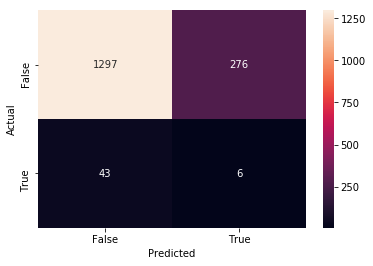

In [220]:
print('Confusion matrix:')
cm = ConfusionMatrix(y_test, yhat)
print(cm)
print('Stats:')
cm.print_stats()
cm.plot(backend='seaborn', annot=True, fmt='g')
plt.show()

### ROC Plot

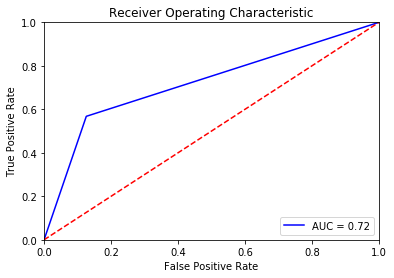

In [221]:
fpr, tpr, threshold = metrics.roc_curve(y_test, yhat)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Case 3: Naive Bayes with Cross Validation

In [222]:
seed = 3421
np.random.seed(seed)
actuals = []
probs = []
hats = []

In [224]:
x = x.values

In [228]:
kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=seed)
for train, test in kfold.split(x, y):
    xtrain = x[train]        
    xtest = x[test]
    model.fit(xtrain, y[train])
    foldhats = model.predict(xtest)
    foldprobs = model.predict_proba(xtest)[:,1]
    actuals = np.append(actuals, y[test])
    probs = np.append(probs, foldprobs)    
    hats = np.append(hats, foldhats)

### Summary of the Model

In [229]:
print('Accuracy:')
print(metrics.accuracy_score(actuals, hats))
print('Classification report:')
print(metrics.classification_report(actuals, hats))

Accuracy:
0.8467272020976984
Classification report:
              precision    recall  f1-score   support

         0.0       0.95      0.88      0.91     36548
         1.0       0.38      0.60      0.47      4640

   micro avg       0.85      0.85      0.85     41188
   macro avg       0.66      0.74      0.69     41188
weighted avg       0.88      0.85      0.86     41188



### Confusion Matrix

Predicted  False  True  __all__
Actual                         
False      32088  4460    36548
True        1853  2787     4640
__all__    33941  7247    41188
population: 41188
P: 4640
N: 36548
PositiveTest: 7247
NegativeTest: 33941
TP: 2787
TN: 32088
FP: 4460
FN: 1853
TPR: 0.600646551724138
TNR: 0.8779686986976032
PPV: 0.38457292672830135
NPV: 0.9454052620724198
FPR: 0.12203130130239685
FDR: 0.6154270732716987
FNR: 0.39935344827586206
ACC: 0.8467272020976984
F1_score: 0.46891562210818544
MCC: 0.3974073394724482
informedness: 0.47861525042174113
markedness: 0.32997818880072116
prevalence: 0.11265417111780131
LRP: 4.922069545384258
LRN: 0.45486069021398046
DOR: 10.821048402904998
FOR: 0.05459473792758021


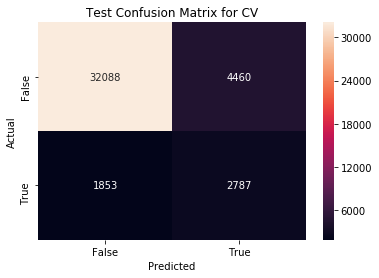

<Figure size 432x288 with 0 Axes>

In [230]:
cm_cv = ConfusionMatrix(actuals, hats)
print(cm_cv)
cm_cv.print_stats()
ax = cm_cv.plot(backend='seaborn', annot=True, fmt='g')
ax.set_title('Test Confusion Matrix for CV')
plt.show()
plt.clf()

### ROC plot

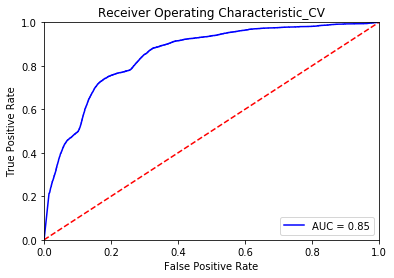

In [231]:
fpr, tpr, threshold = metrics.roc_curve(actuals, probs)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic_CV')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Generalization Error 

Case 1: (1 - accuracy)	 (1 – 0.84655) 	0.15344
Case 2: (1 - accuracy)	 (1 – 0.83940) 	 0.1606
Case 3: (1 - accuracy)	 (1 – 0.84672) 	0.15328
    
On Cross Validation of dataset, we get minimum generalization error